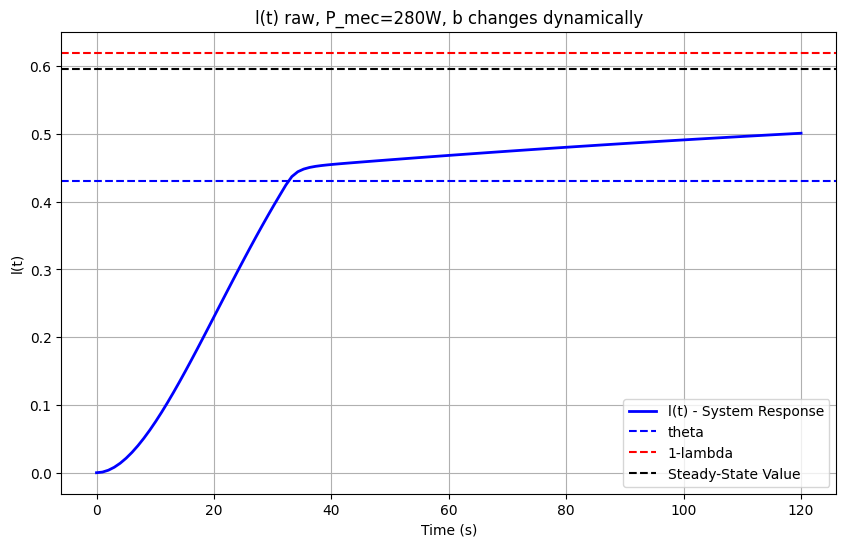

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
C1=20.9 # J/ml energy/ml of oxygen, Fixed for now
C2=100 #J/mmol joules/accum lac in muscle
C3=43.3
MO=1.34
phi=.3
a = 603.137
b_default = 40.522
b_alternative = 389.637  # New value when l > theta
c = 1.914
theta = 0.43
lamb = 0.38
P_mec = 280
eta = 0.24551
Pp_magnitude = (P_mec / eta) / 1000  # Compute Pp_magnitude
b_used = []
# Define the system of first-order ODEs by converting the second-order equation
def system(t, y):
    l, l_dot = y  # y[0] = l, y[1] = dl/dt
    if l > theta:
      b = b_alternative
    elif l <= theta:
      b = b_default
    b_used.append(b)
    #b = b_alternative if l > theta else b_default  # Adjust b based on l
    #b_used.append(b)  # Record the used value of b
    l_ddot = (Pp_magnitude - b * l_dot - c * l) / a  # Solve for d^2l/dt^2
    return [l_dot, l_ddot]

# Time span for simulation
time_minutes = 2
t_span = (0, time_minutes * 60)  # Simulate for the specified duration
t_eval = np.linspace(0, time_minutes * 60, time_minutes * 60)  # Time points for evaluation

# Initial conditions: l(0) = 0, dl/dt(0) = 0
y0 = [0, 0]
# Solve the differential equation
solution = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45')
t_list = solution.t
l_list = solution.y[0]

plt.figure(figsize=(10, 6))
plt.plot(t_list, l_list, label="l(t) - System Response", color='blue', linewidth=2)
plt.axhline(y=theta, color='blue', linestyle='dashed', label="theta")
plt.axhline(y=1 - lamb, color='r', linestyle='dashed', label="1-lambda")
plt.axhline(y=Pp_magnitude / c, color='black', linestyle='dashed', label="Steady-State Value")
plt.xlabel("Time (s)")
plt.ylabel("l(t)")
titletext = f"l(t) raw, P_mec={P_mec}W, b changes dynamically"
plt.title(titletext)
plt.legend()
plt.grid()
plt.show()

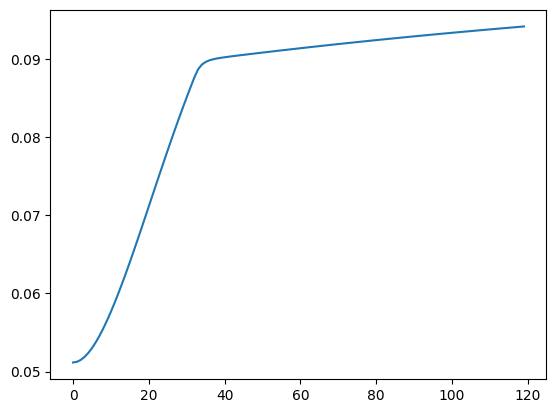

In [ ]:
VO2_list = (1/C1) *(Pp_magnitude + (MO*l_list)/(1-phi)) #ml_O2/sec
VO2permin= VO2_list*60 *(1/64) #??? TODO FIX WTFFFF WEIRD ASS VALUES
plt.plot(VO2permin)

855.3623070343367


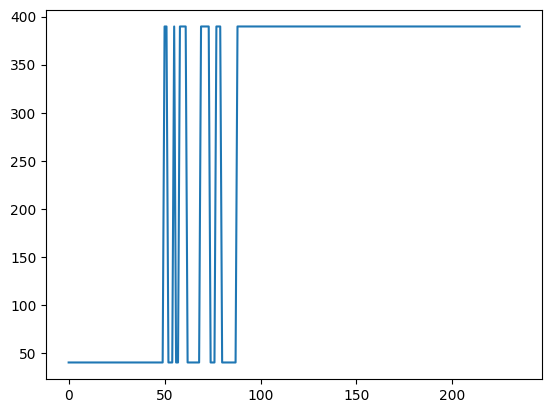

236
120 2


In [ ]:
print(210/eta)
plt.plot(b_used)
plt.show()
print(len(b_used))
print(len(t_eval),len(t_span))

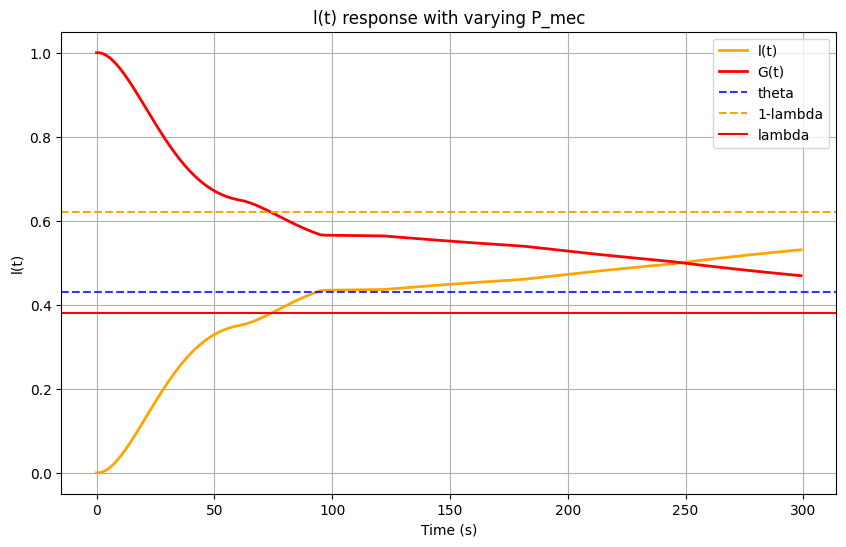

In [ ]:
#CURRENT WORKING MODEL
import numpy as np
import matplotlib.pyplot as plt

time_seconds = 300

# Given parameters
C1 = 20.9  # J/ml energy/ml of oxygen, Fixed for now
C2 = 100  # J/mmol joules/accum lac in muscle
C3 = 43.3
MO = 1.34
phi = 0.3
AT = 11.27
AG = 320.3
a = 603.137
b_default = 40.522
b_alternative = 389.637  # New value when l > theta
c = 1.914
theta = 0.43
lamb = 0.38
eta = 0.24551

# Initialize lists
b_used_list = np.zeros(time_seconds)
Lac_m_list = np.zeros(time_seconds)
l_list = np.zeros(time_seconds)
G_list = np.zeros(time_seconds)
G_list[0] = 1
Lac_m_list[0] = 1.5
t = np.arange(0, time_seconds, 1)

# Define a function to dynamically update P_mec
numbers = [150, 210, 250, 280, 300]
reps = 60
repeated_numbers = np.repeat(numbers, reps)
P_mec_values = repeated_numbers.tolist()
P_phys_values = [(x / eta /1000) for x in P_mec_values]

# Initialize the system
y = [0, 0]  # Initial conditions: l(0) = 0, dl/dt(0) = 0

# Explicit Euler method to ensure updates at exact integer steps
for i in range(time_seconds -1):
    l, l_dot = y
    P_mec = P_mec_values[i]
    Pp_magnitude = P_phys_values[i]  # Compute Pp_magnitude

    b = b_alternative if l > theta else b_default
    b_used_list[i] = b

    Lac_m = (1/C2) * l * AT if l <= theta else (1/C2) * ((l - theta) * AG + theta * AT)
    Lac_m += 1.5
    Lac_m_list[i] = Lac_m
    # if i == time_seconds-2:
    #   print(i,'s')
    #   Lac_m_list[i+2] = Lac_m_list[i]

    l_ddot = (Pp_magnitude - b * l_dot - c * l) / a

    # Explicit Euler update
    l_new = l + l_dot
    l_dot_new = l_dot + l_ddot

    y = [l_new, l_dot_new]
    l_list[i + 1] = l_new
    G_list[i + 1] = 1 - l_new


Lac_m_list[-1]=Lac_m_list[-2] #ugly mf fix

#FOR CONSTANT WORK RATE ONLY:::
VO2_list = (1/C1) *([x*1000 for x in P_phys_values] + (1000*MO*l_list)/(1-phi)) #ml_O2/sec
VO2permin= VO2_list * 60 * (1/64)

plt.figure(figsize=(10, 6))
plt.plot(t, l_list, label="l(t)", color='orange', linewidth=2)
plt.plot(t, G_list, label="G(t)", color='red', linewidth=2)
plt.axhline(y=theta, color='blue', linestyle='dashed', label="theta",alpha=.8)
plt.axhline(y=1 - lamb, color='orange', linestyle='dashed', label="1-lambda")
plt.axhline(y=lamb, color='r', label="lambda")
plt.xlabel("Time (s)")
plt.ylabel("l(t)")
titletext = "l(t) response with varying P_mec"
plt.title(titletext)
plt.legend()
plt.grid()
plt.show()

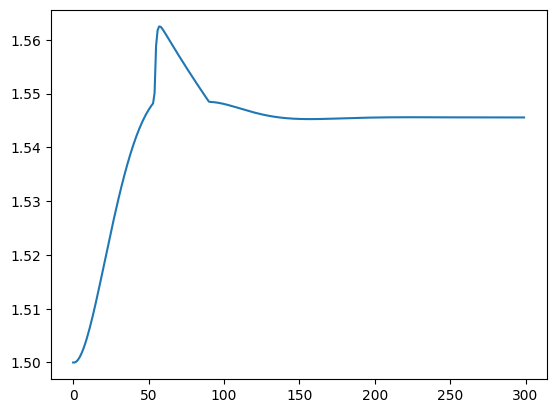

In [ ]:
plt.plot(Lac_m_list)
#plt.plot(b_used_list)
#plt.plot(VO2permin)
#plt.plot(P_phys_values)
#plt.plot(P_mec_values
plt.show()
#plt.xlim([295,300])
#print(Lac_m_list[-1])

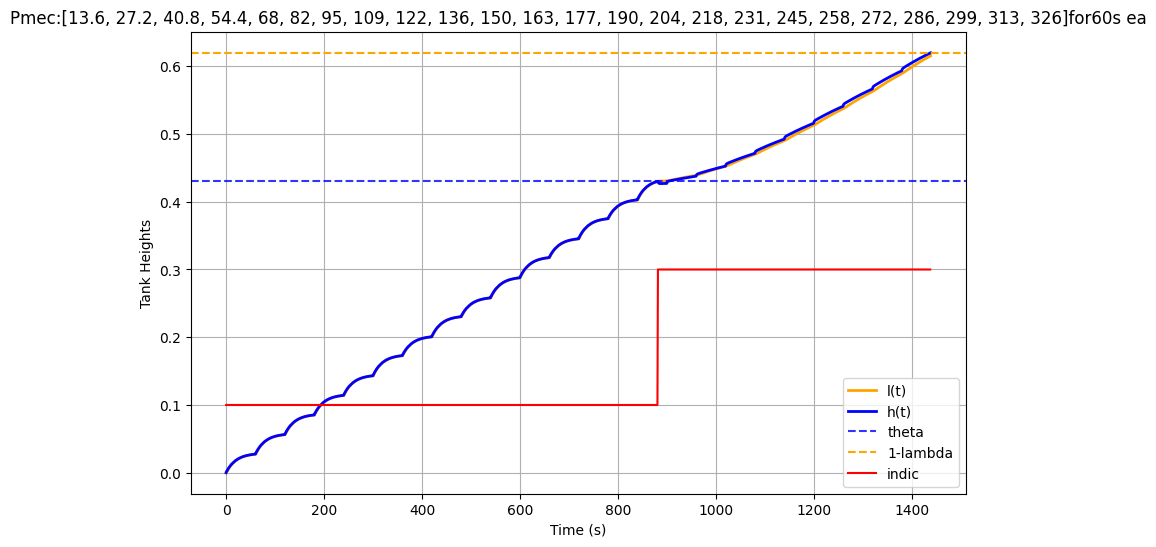

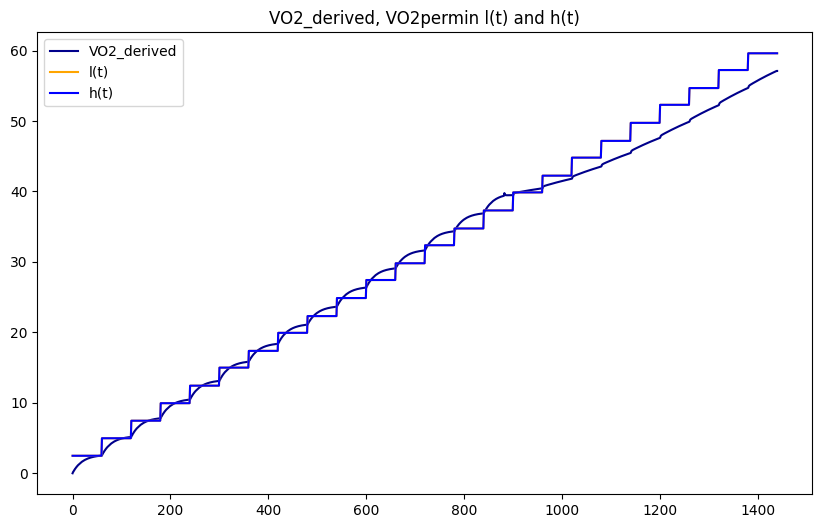

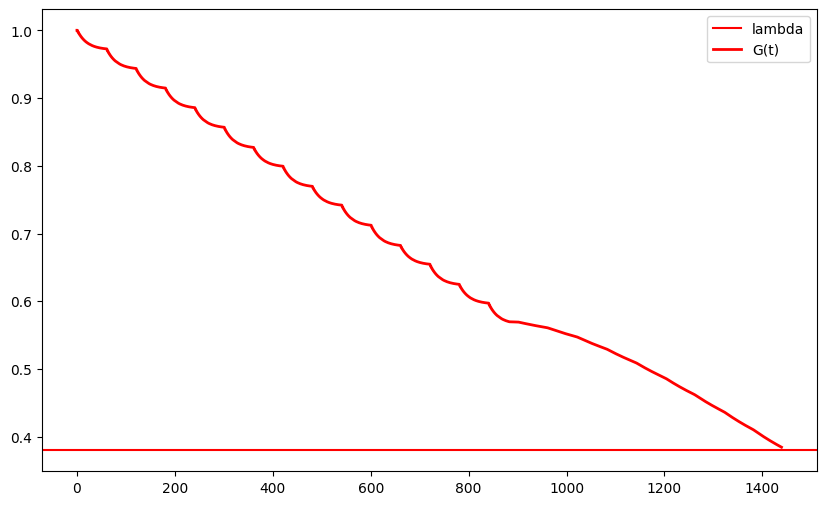

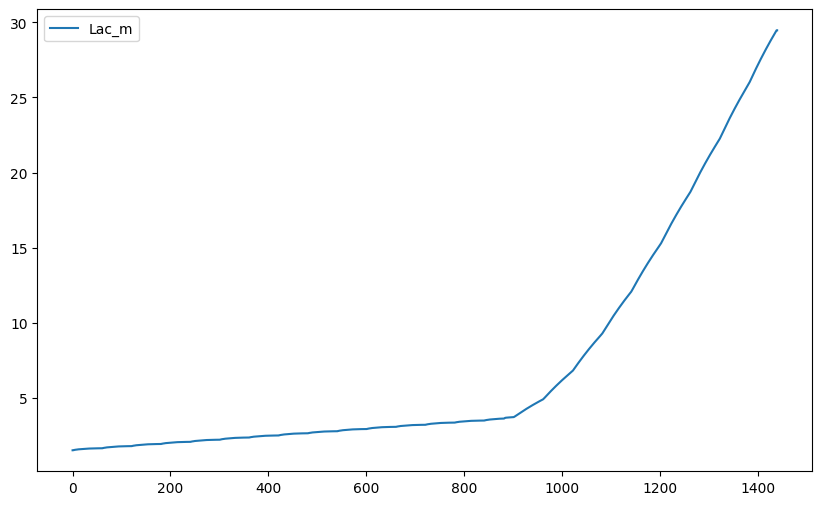

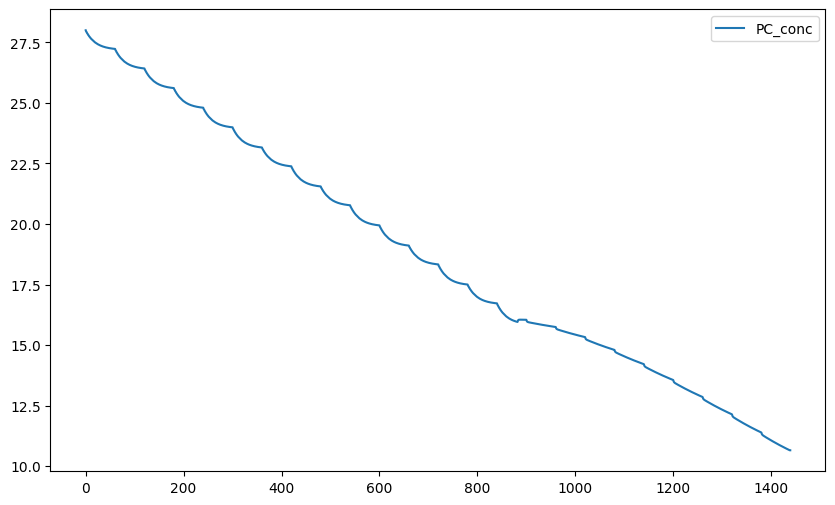

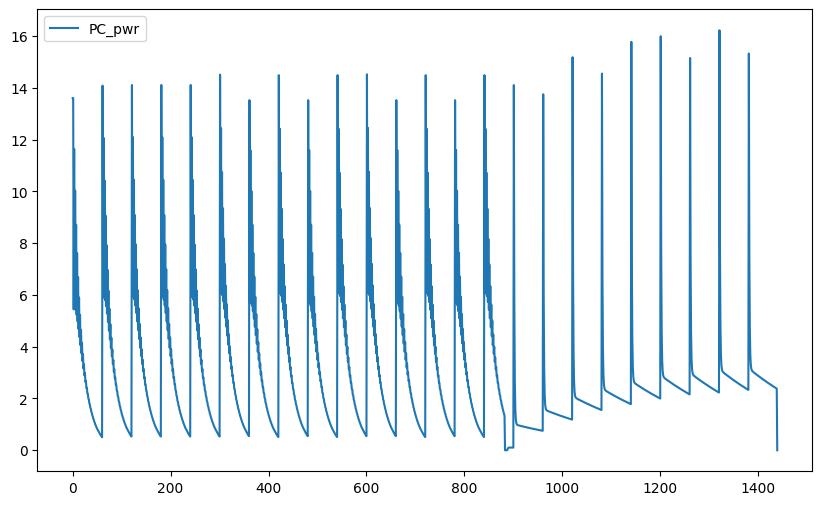

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#time_seconds = 300
C1 = 20.9  # J/ml energy/ml of oxygen, Fixed for now
C2 = 100  # J/mmol joules/accum lac in muscle
C3 = 43.3 # J/mmol of PC stores

MG = 9.15
MO = 1.34
MP=4.48
MR=3.66
phi = 0.3

AT = 11.27
AG = 320.3
AP = 27.79

theta = 0.43
lamb = 0.38
eta = 0.24551

PCmax = 28 # mmol/kg w.wgt. main page 6
m_muscle = 1000 * AP / (C3 * PCmax)

# a_low = (AP*AG/MG)*(1-lamb)
# b_low = (((MO*(1-lamb))/(MG*(1-phi)))+1)*AT + AP
# c_low = MO/(1-phi)
# a_high = (AP*AG/MG)*(1-lamb)
# b_high = (((MO*(1-lamb))/(MG*(1-phi)))+1)*AG + AP
# c_high = MO/(1-phi)

# a = 603.137
# b_default = 40.522
# b_alternative = 389.637  # New value when l > theta
# c = 1.914

# print("low",a_low,b_low,c_low)
# print("hi",a_high,b_high,c_high)
# print("hardcoded",a,b_default,b_alternative,c)

#numbers = [150, 190, 210, 220, 250,250,250]
#numbers = [190, 190, 190, 190, 190]
#numbers = [140, 140, 140, 140, 140]
#numbers = [150,150,150]
#numbers = [190,190,190,190,190]
#numbers = [210,210,210,210,210]
nums = [180,180,230,230,180,180,230,230] #OU LT1
#nums = [250,250,310,310,250,250,310,310]
#nums=[230,230,230]
nums = [13.6,27.2,40.8,54.4,68,82,95,109,122,136,150,163,177,190,204,218,231,245,258,272,286,299,313,326] #fig 5B should fail at ~300 W
#nums = [150,200,250,300,350,400]
nums=[500,500,500]
reps = 60
repeated_numbers = np.repeat(nums, reps)
P_mec_values = repeated_numbers.tolist()
P_phys_values = [(x / eta / 1000) for x in P_mec_values]
time_seconds = len(nums)*reps
b_used_list = np.zeros(time_seconds)
Lac_m_list = np.zeros(time_seconds)
l_list = np.zeros(time_seconds)
G_list = np.zeros(time_seconds)
h_list = np.zeros(time_seconds)  # New list for h values
dhdt_list = np.zeros(time_seconds)  # Track dh/dt
d2hdt2_list = np.zeros(time_seconds)  # Track d^2h/dt^2
G_list[0] = 1
Lac_m_list[0] = 1.5
h_list[0] = 0  # Initial condition for h
VO2_derived = np.zeros(time_seconds)
VO2_derived[0] = 0
t = np.arange(0, time_seconds, 1)
indicatorlist = []
h_ddot_list = np.zeros(time_seconds)
G_pwr_list = np.zeros(time_seconds)
PC_conc_list = np.zeros(time_seconds)
PC_pwr_list = np.zeros(time_seconds)
# Initialize the system
y = [0, 0]  # Initial conditions: l(0) = 0, dl/dt(0) = 0
h = 0  # Initial condition for h
h_dot = 0  # Initial dh/dt

# Explicit Euler method to ensure updates at exact integer steps
for i in range(time_seconds - 1):
    l, l_dot = y
    P_mec = P_mec_values[i]
    Pp_magnitude = P_phys_values[i]  # Compute Pp_magnitude

    if l > theta: #AG
      if l_dot >=0: #output MG
        a_cur = (AP*AG/MG)*(1-lamb)
        b_cur = (((MO*(1-lamb))/(MG*(1-phi)))+1)*AG + AP
      elif l_dot < 0: #recovery MR
        a_cur = (AP*AG/MR)*(1-lamb)
        b_cur = (((MO*(1-lamb))/(MR*(1-phi)))+1)*AG + AP
      q=.3
    elif l <= theta: #AT
      if l_dot >=0: #output MG
        a_cur = (AP*AT/MG)*(1-lamb)
        b_cur = (((MO*(1-lamb))/(MG*(1-phi)))+1)*AT + AP
      elif l_dot <0: #recovery MR
        a_cur = (AP*AT/MR)*(1-lamb)
        b_cur = (((MO*(1-lamb))/(MR*(1-phi)))+1)*AT + AP
      q=.1
    c_cur = MO/(1-phi)

    b_used_list[i] = b_cur

    Lac_m = (1/C2) * l *1000* AT if l <= theta else (1/C2) * ((l - theta) * AG*1000 + theta * AT*1000)
    Lac_m = Lac_m/m_muscle
    Lac_m += 1.5
    Lac_m_list[i] = Lac_m

    l_ddot = (Pp_magnitude - b_cur * l_dot - c_cur * l) / a_cur

    if l > theta: #AG
      if l_dot >=0: #output MG
        h_dot = l_dot + ((1-lamb)*AG/MG)*l_ddot
      elif l_dot < 0: #recovery MR
        h_dot = l_dot + ((1-lamb)*AG/MR)*l_ddot
    elif l <= theta: #AT
      if l_dot >=0: #output MG
        h_dot = l_dot + ((1-lamb)*AT/MG)*l_ddot
      elif l_dot <0: #recovery MR
        h_dot = l_dot + ((1-lamb)*AT/MR)*l_ddot


    if l < theta:
      VO2_derived[i]=(Pp_magnitude - AP*h_dot - AT*l_dot)*1000/C1
    elif l>= theta:
      VO2_derived[i]= (Pp_magnitude - AP*h_dot - AG*l_dot)*1000/C1

    PC_conc_list[i] = ((1-h)*AP*1000) / (C3*m_muscle)
    PC_pwr_list[i] = (PC_conc_list[i-1] - PC_conc_list[i]) * m_muscle * C3 * eta
    #UPDATES FOR NEXT STEP, DO NOT SEPARATE
    h_new = h + h_dot
    h = h_new
    h_list[i + 1] = h
    dhdt_list[i + 1] = h_dot
    l_new = l + l_dot
    l_dot_new = l_dot + l_ddot
    y = [l_new, l_dot_new]
    l_list[i + 1] = l_new
    G_list[i + 1] = 1 - l_new
    h_ddot_list[i+1] = h_dot - h_ddot_list[i]
    indicatorlist.append(q)

#post-loop dirty fixes:
Lac_m_list[-1] = Lac_m_list[-2]  # Fix last value
VO2_derived[-1]= VO2_derived[-2]
PC_pwr_list[0]=P_mec_values[0]
PC_conc_list[-1]=PC_conc_list[-2]
PC_pwr_list = np.clip(PC_pwr_list,0,None)


# FOR CONSTANT WORK RATE ONLY:::
VO2_list_l = (1/C1) * ([x*1000 for x in P_phys_values] + (1*MO*l_list)/(1-phi))  # ml_O2/sec
VO2_list_h = (1/C1) * ([x*1000 for x in P_phys_values] + (1*MO*h_list)/(1-phi))  # ml_O2/sec
VO2permin_l = VO2_list_l * 60 * (1/64)
VO2permin_h = VO2_list_h * 60 * (1/64)

plt.figure(figsize=(10, 6))
plt.plot(t, l_list, label="l(t)", color='orange', linewidth=2)
plt.plot(t, h_list, label="h(t)", color='blue', linewidth=2)
plt.axhline(y=theta, color='blue', linestyle='dashed', label="theta", alpha=.8)
plt.axhline(y=1 - lamb, color='orange', linestyle='dashed', label="1-lambda")
plt.plot(indicatorlist,color='red',label='indic')
plt.xlabel("Time (s)")
plt.ylabel("Tank Heights")
titletext = "Pmec:" + str(nums)+"for"+str(reps)+"s ea"
plt.title(titletext)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(VO2_derived,color='darkblue',label='VO2_derived')
plt.plot(VO2permin_l, label="l(t)",color='orange')
plt.plot(VO2permin_h, label="h(t)",color='blue')
plt.title('VO2_derived, VO2permin l(t) and h(t)')
plt.legend()
#plt.title('VO2permin l and h')

plt.figure(figsize=(10,6))
plt.axhline(y=lamb, color='r', label="lambda")
plt.plot(t, G_list, label="G(t)", color='red', linewidth=2)
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(Lac_m_list,label='Lac_m')
plt.legend()
#plt.plot(h_ddot_list)

plt.figure(figsize=(10,6))
plt.plot(PC_conc_list,label='PC_conc')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(PC_pwr_list,label='PC_pwr')
plt.legend()

In [ ]:
print(PC_pwr_list)
print(PC_conc_list)

[13.6        13.6         5.44080737 ...  2.39315878  2.38131037
  0.        ]
[20.         19.96013322 19.94418414 ...  7.61662078  7.60964025
  0.        ]


1186


Text(0, 0.5, 'Lactate (mmol/kg_muscle)')

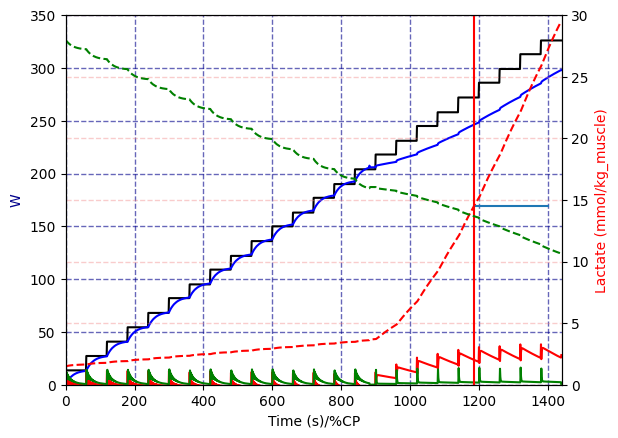

In [ ]:
#paper figure recreations:
#FIG 5B:
atw = 61 #kg total body mass
P_VO2 = VO2_derived*atw*eta*C1*(1/60)
y_lac_fail = 14.5
x_lac_fail = np.abs(Lac_m_list - 14.5).argmin()
print(x_lac_fail)
anaerobic_w = P_mec_values - P_VO2 - PC_pwr_list
#TODO: add lac m experimental from boillet - webplotdigi!
#TODO: recreat figA too
#TODO: make simulation fn^^ an actual callable fn

fig1,ax1 = plt.subplots()
fig1.figsize=(10, 6)
ax1.plot(P_mec_values,label='Pmec',color='black')
ax1.plot(P_VO2,label='VO2_derived',color='blue')
ax1.plot(anaerobic_w,label='anaerobic_w',color='red')
ax1.plot(PC_pwr_list,label="P_PC",color='green')
ax1.set_ylim(0,350)
ax1.set_xlim(0,len(P_mec_values))
#ax1.plot([x_lac_fail,1400],[14.5,14.5])

ax2=ax1.twinx()
ax2.plot(Lac_m_list,label='Lac_m',color='red',linestyle='--')
ax2.set_ylim(0,30)
ax2.plot([x_lac_fail,1400],[14.5,14.5])
ax2.plot([x_lac_fail,x_lac_fail],[0,30],color='red')
ax2.plot(PC_conc_list,label='PC_conc',color='green',linestyle='--')
#ax2.set_ylim(0,1)

ax1.grid(which='major', linestyle='--', linewidth=1, color='darkblue', alpha=0.6)  # Left y-axis grid (dark blue)
ax2.grid(which='major', linestyle='--', linewidth=1, color='lightcoral', alpha=0.4)  # Right y-axis grid (light red)
ax1.set_xlabel("Time (s)/%CP")  # Label for the x-axis
ax1.set_ylabel("W", color='darkblue')  # Label for left y-axis
ax2.set_ylabel("Lactate (mmol/kg_muscle)", color='red')  # Label for right y-axis



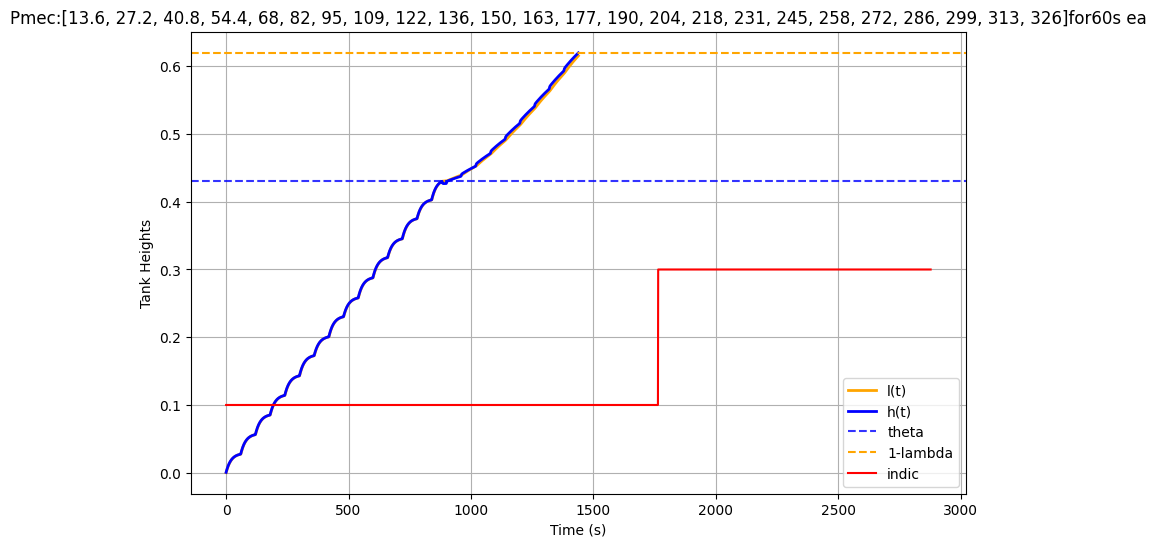

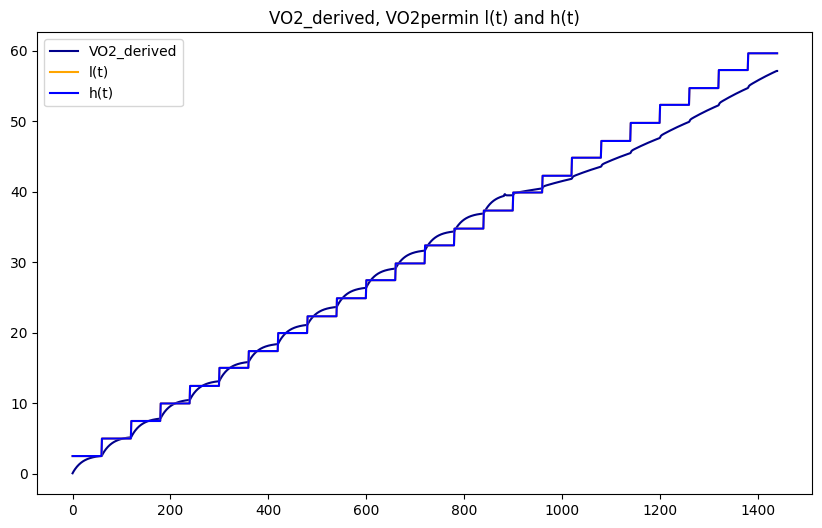

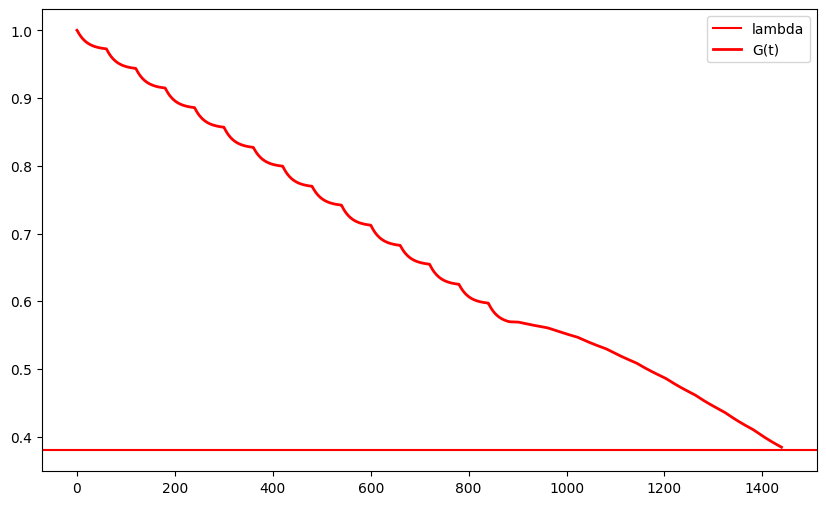

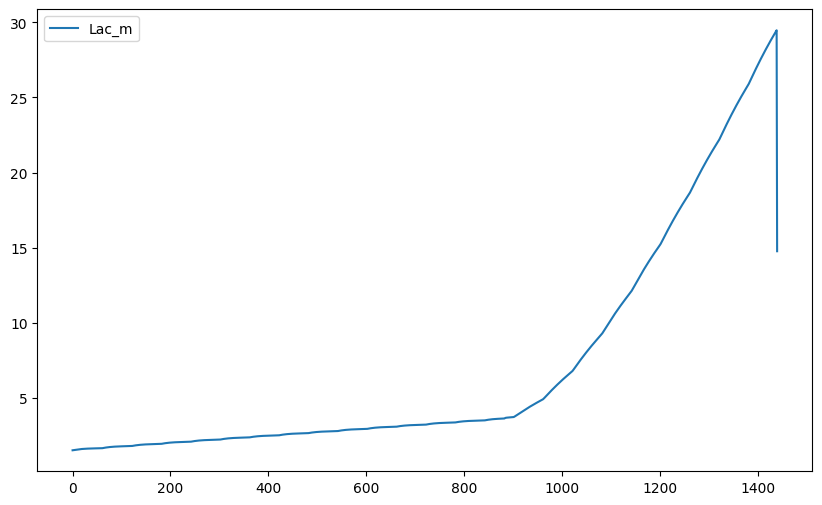

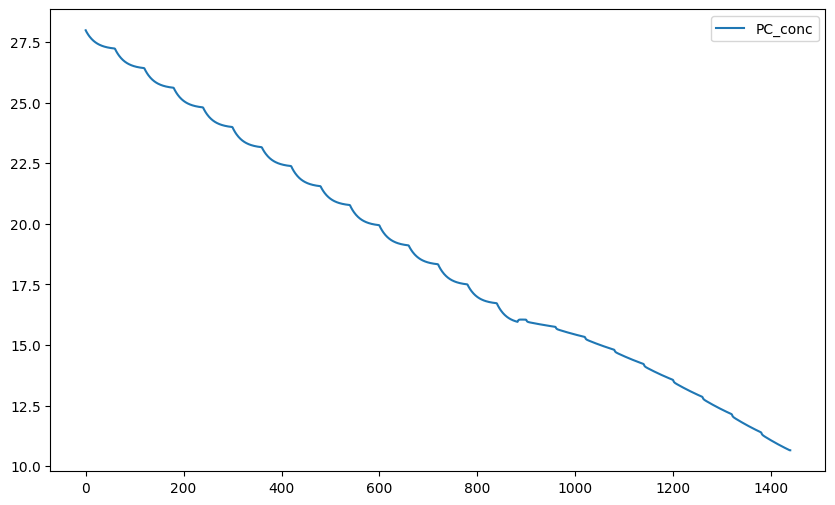

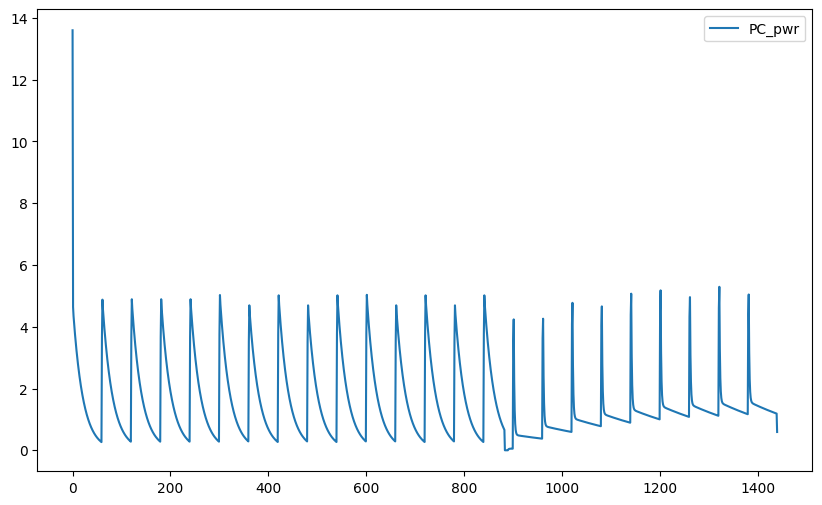

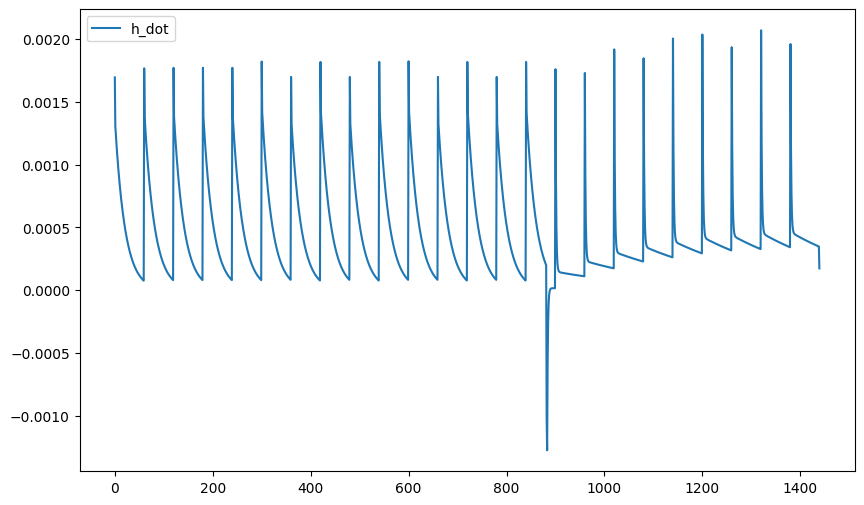

In [ ]:
#resolution 2x:
import numpy as np
import matplotlib.pyplot as plt
C1 = 20.9  # J/ml energy/ml of oxygen, Fixed for now
C2 = 100  # J/mmol joules/accum lac in muscle
C3 = 43.3 # J/mmol of PC stores

MG = 9.15
MO = 1.34
MP=4.48
MR=3.66
phi = 0.3

AT = 11.27
AG = 320.3
AP = 27.79

theta = 0.43
lamb = 0.38
eta = 0.24551

PCmax = 28 # mmol/kg w.wgt. main page 6
m_muscle = 1000 * AP / (C3 * PCmax)
#nums = [300, 300, 300,300]
#nums = [160,230,230,160,295,295,295,160]
#nums = [150,230,150,150,230,230,150]
nums = [195,195,195]
nums=[224,224,224,224,224]
nums=[295,295,295,295,295,295,295]
nums = [13.6,27.2,40.8,54.4,68,82,95,109,122,136,150,163,177,190,204,218,231,245,258,272,286,299,313,326] #fig 5B should fail at ~300 W

reps = 60
repeated_numbers = np.repeat(nums, reps)
P_mec_values = repeated_numbers.tolist()
P_phys_values = [(x / eta / 1000) for x in P_mec_values]
time_seconds = len(nums) * reps

time_steps = time_seconds * 2  # Double the update resolution
b_used_list = np.zeros(time_steps)
Lac_m_list = np.zeros(time_steps)
l_list = np.zeros(time_steps)
G_list = np.zeros(time_steps)
h_list = np.zeros(time_steps)
dhdt_list = np.zeros(time_steps)
d2hdt2_list = np.zeros(time_steps)
G_list[0] = 1
Lac_m_list[0] = 1.5
h_list[0] = 0
VO2_derived = np.zeros(time_steps)
t = np.arange(0, time_steps, 1)
indicatorlist = []
h_ddot_list = np.zeros(time_steps)
G_pwr_list = np.zeros(time_steps)
PC_conc_list = np.zeros(time_steps)
PC_pwr_list = np.zeros(time_steps)

# Initialize the system
y = [0, 0]  # Initial conditions: l(0) = 0, dl/dt(0) = 0
h = 0  # Initial condition for h
h_dot = 0  # Initial dh/dt

# Explicit Euler method with 2 updates per second
for i in range(time_steps - 1):
    l, l_dot = y
    P_mec = P_mec_values[i // 2]  # Ensure correct indexing
    Pp_magnitude = P_phys_values[i // 2]

    if l > theta:
        if l_dot >= 0:
            a_cur = (AP * AG / MG) * (1 - lamb)
            b_cur = (((MO * (1 - lamb)) / (MG * (1 - phi))) + 1) * AG + AP
        else:
            a_cur = (AP * AG / MR) * (1 - lamb)
            b_cur = (((MO * (1 - lamb)) / (MR * (1 - phi))) + 1) * AG + AP
        q = .3
    else:
        if l_dot >= 0:
            a_cur = (AP * AT / MG) * (1 - lamb)
            b_cur = (((MO * (1 - lamb)) / (MG * (1 - phi))) + 1) * AT + AP
        else:
            a_cur = (AP * AT / MR) * (1 - lamb)
            b_cur = (((MO * (1 - lamb)) / (MR * (1 - phi))) + 1) * AT + AP
        q = .1
    c_cur = MO / (1 - phi)

    b_used_list[i] = b_cur

    Lac_m = (1 / C2) * l * 1000 * AT if l <= theta else (1 / C2) * ((l - theta) * AG * 1000 + theta * AT * 1000)
    Lac_m = Lac_m / m_muscle
    Lac_m += 1.5
    Lac_m_list[i] = Lac_m

    l_ddot = (Pp_magnitude - b_cur * l_dot - c_cur * l) / a_cur

    if l > theta: # AG gov ???? TODO: not sure. tbh prolly not cuz why would G tank thresh affect? should be same volume loss / time
        if l_dot >= 0:
            h_dot = l_dot + ((1 - lamb) * AG / MG) * l_ddot
        else:
            h_dot = l_dot + ((1 - lamb) * AG / MR) * l_ddot
    elif l <theta: # AT gov
        if l_dot >= 0:
            h_dot = l_dot + ((1 - lamb) * AT / MG) * l_ddot
        else:
            h_dot = l_dot + ((1 - lamb) * AT / MR) * l_ddot
    elif l == theta:
        ATAGavg = np.mean(AT,AG)
        if l_dot >= 0:
            h_dot = l_dot + ((1 - lamb) * ATAGavg / MG) * l_ddot
        else:
            h_dot = l_dot + ((1 - lamb) * ATAGavg / MR) * l_ddot

    arb_h_dot_cutoff = .25 #ineffective, causes problems if it does anything...
    if h_dot < 0:
        h_dot = max(h_dot,-arb_h_dot_cutoff)
    elif h_dot > 0:
        h_dot = min(h_dot,arb_h_dot_cutoff)

    if l < theta:
        VO2_derived[i] = (Pp_magnitude - AP * h_dot - AT * l_dot) * 1000 / C1
    else:
        VO2_derived[i] = (Pp_magnitude - AP * h_dot - AG * l_dot) * 1000 / C1

    PC_conc_list[i] = ((1 - h) * AP * 1000) / (C3 * m_muscle)
    PC_pwr_list[i] = (PC_conc_list[i - 1] - PC_conc_list[i]) * m_muscle * C3 * eta

    h_new = h + h_dot / 2  # Adjust for finer step
    h = h_new
    h_list[i + 1] = h
    dhdt_list[i ] = h_dot #og =1 index

    l_new = l + l_dot / 2
    l_dot_new = l_dot + l_ddot / 2
    y = [l_new, l_dot_new]
    l_list[i + 1] = l_new
    G_list[i + 1] = 1 - l_new
    h_ddot_list[i + 1] = h_dot - h_ddot_list[i]
    indicatorlist.append(q)

# Downsample by averaging adjacent values to restore 1x resolution
b_used_list = b_used_list.reshape(-1, 2).mean(axis=1)
Lac_m_list = Lac_m_list.reshape(-1, 2).mean(axis=1)
l_list = l_list.reshape(-1, 2).mean(axis=1)
G_list = G_list.reshape(-1, 2).mean(axis=1)
h_list = h_list.reshape(-1, 2).mean(axis=1)
dhdt_list = dhdt_list.reshape(-1, 2).mean(axis=1)
h_ddot_list = h_ddot_list.reshape(-1, 2).mean(axis=1)
PC_conc_list = PC_conc_list.reshape(-1, 2).mean(axis=1)
PC_pwr_list = PC_pwr_list.reshape(-1, 2).mean(axis=1)
VO2_derived = VO2_derived.reshape(-1, 2).mean(axis=1)
VO2_derived[-1]=VO2_derived[-2]

t = np.arange(0, time_seconds, 1)

PC_pwr_list[0] = P_mec_values[0]
PC_conc_list[-1] = PC_conc_list[-2]
PC_pwr_list = np.clip(PC_pwr_list, 0, None)

VO2_list_l = (1 / C1) * ([x * 1000 for x in P_phys_values] + (1 * MO * l_list) / (1 - phi))
VO2_list_h = (1 / C1) * ([x * 1000 for x in P_phys_values] + (1 * MO * h_list) / (1 - phi))
VO2permin_l = VO2_list_l * 60 * (1/64)
VO2permin_h = VO2_list_h * 60 * (1/64)

plt.figure(figsize=(10, 6))
plt.plot(t, l_list, label="l(t)", color='orange', linewidth=2)
plt.plot(t, h_list, label="h(t)", color='blue', linewidth=2)
plt.axhline(y=theta, color='blue', linestyle='dashed', label="theta", alpha=.8)
plt.axhline(y=1 - lamb, color='orange', linestyle='dashed', label="1-lambda")
plt.plot(indicatorlist,color='red',label='indic')
plt.xlabel("Time (s)")
plt.ylabel("Tank Heights")
titletext = "Pmec:" + str(nums)+"for"+str(reps)+"s ea"
plt.title(titletext)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(VO2_derived,color='darkblue',label='VO2_derived')
plt.plot(VO2permin_l, label="l(t)",color='orange')
plt.plot(VO2permin_h, label="h(t)",color='blue')
plt.title('VO2_derived, VO2permin l(t) and h(t)')
plt.legend()
#plt.title('VO2permin l and h')

plt.figure(figsize=(10,6))
plt.axhline(y=lamb, color='r', label="lambda")
plt.plot(t, G_list, label="G(t)", color='red', linewidth=2)
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(Lac_m_list,label='Lac_m')
plt.legend()
#plt.plot(h_ddot_list)

plt.figure(figsize=(10,6))
plt.plot(PC_conc_list,label='PC_conc')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(PC_pwr_list,label='PC_pwr')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(dhdt_list,label='h_dot')
plt.legend()

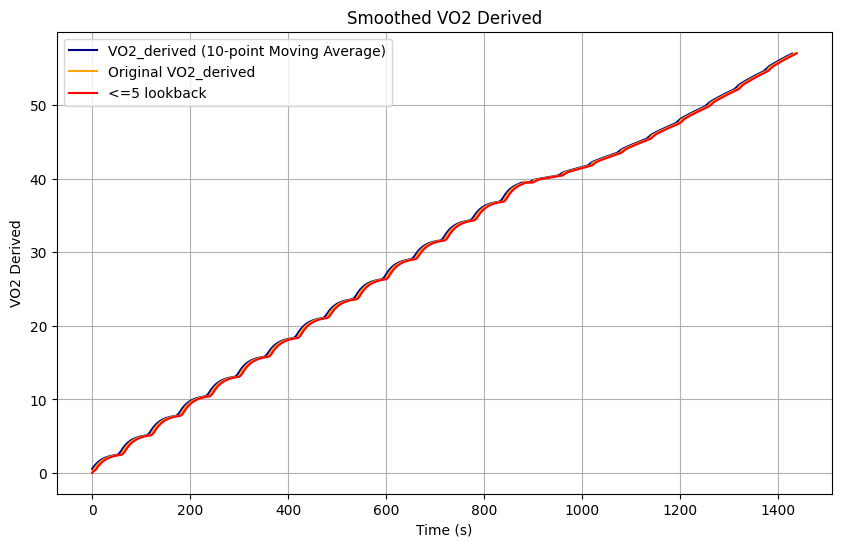

In [ ]:
VO2_avgd = np.convolve(VO2_derived, np.ones(10)/10, mode='valid')
lookback = 7

lookback5 = [sum(VO2_derived[max(0, i - lookback-1):i + 1]) / (i - max(0, i - lookback-1) + 1) for i in range(len(VO2_derived))]

# Plot the smoothed VO2_derived
plt.figure(figsize=(10, 6))
plt.plot(VO2_avgd, color='darkblue', label='VO2_derived (10-point Moving Average)')
plt.plot(VO2_derived, color='orange', label='Original VO2_derived')
plt.plot(lookback5,color='red',label='<=5 lookback')
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("VO2 Derived")
plt.title("Smoothed VO2 Derived")
plt.show()

1185


Text(0.5, 1.0, 'Pmec:[13.6, 27.2, 40.8, 54.4, 68, 82, 95, 109, 122, 136, 150, 163, 177, 190, 204, 218, 231, 245, 258, 272, 286, 299, 313, 326]for60s ea')

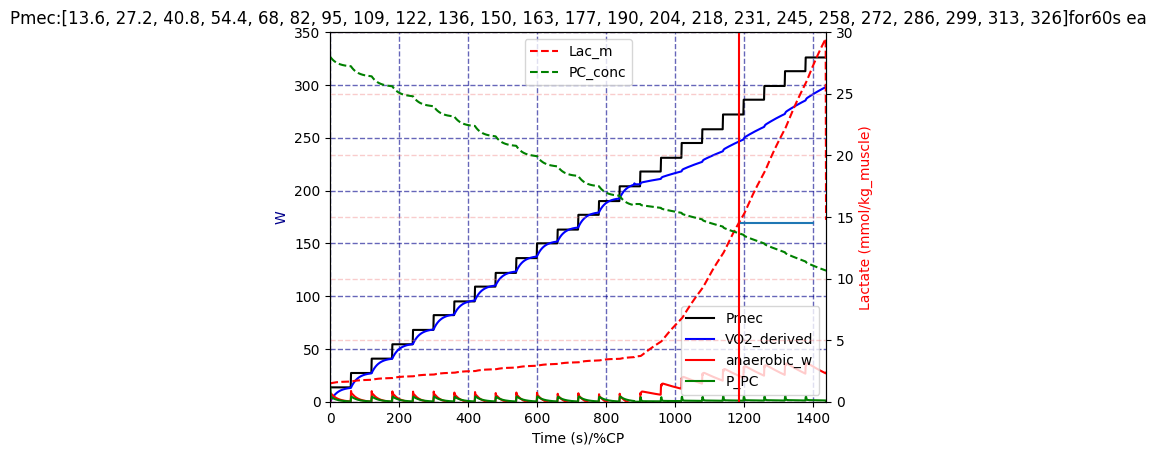

In [ ]:
#paper figure recreations:
#FIG 5B:
atw = 61 #kg total body mass
P_VO2 = VO2_derived*atw*eta*C1*(1/60)
y_lac_fail = 14.5
x_lac_fail = np.abs(Lac_m_list - 14.5).argmin()
print(x_lac_fail)
anaerobic_w = P_mec_values - P_VO2 - PC_pwr_list
#TODO: add lac m experimental from boillet - webplotdigi!
#TODO: recreat figA too
#TODO: make simulation fn^^ an actual callable fn

fig1,ax1 = plt.subplots()
fig1.figsize=(10, 6)
ax1.plot(P_mec_values,label='Pmec',color='black')
ax1.plot(P_VO2,label='VO2_derived',color='blue')
ax1.plot(anaerobic_w,label='anaerobic_w',color='red')
ax1.plot(PC_pwr_list,label="P_PC",color='green')
ax1.set_ylim(0,350)
ax1.set_xlim(0,len(P_mec_values))
#ax1.plot([x_lac_fail,1400],[14.5,14.5])


ax2=ax1.twinx()
ax2.plot(Lac_m_list,label='Lac_m',color='red',linestyle='--')
ax2.set_ylim(0,30)
ax2.plot([x_lac_fail,1400],[14.5,14.5])
ax2.plot([x_lac_fail,x_lac_fail],[0,30],color='red')
ax2.plot(PC_conc_list,label='PC_conc',color='green',linestyle='--')
#ax2.set_ylim(0,1)

ax1.grid(which='major', linestyle='--', linewidth=1, color='darkblue', alpha=0.6)  # Left y-axis grid (dark blue)
ax2.grid(which='major', linestyle='--', linewidth=1, color='lightcoral', alpha=0.4)  # Right y-axis grid (light red)
ax1.set_xlabel("Time (s)/%CP")  # Label for the x-axis
ax1.set_ylabel("W", color='darkblue')  # Label for left y-axis
ax2.set_ylabel("Lactate (mmol/kg_muscle)", color='red')  # Label for right y-axis
ax1.legend(loc='lower right')
ax2.legend(loc="upper center")
titletext = "Pmec:" + str(nums)+"for"+str(reps)+"s ea"
ax1.set_title(titletext)
#


In [13]:
#V11: making a callable fn to do a single simulation:
import numpy as np

def dtsim1(MG=9.15, MO=1.34, MP=4.48, MR=3.66, phi=.3, lamb=.38, AT=11.27, AP=27.79, AG=320.3, theta=.43, PCmax=20, nums=[180,180,180]):
    C1 = 20.9  # J/ml energy/ml of oxygen, Fixed for now
    C2 = 100  # J/mmol joules/accum lac in muscle
    C3 = 43.3 # J/mmol of PC stores
    atw = 61 #kg total body mass

    eta = 0.24551
    m_muscle = 1000 * AP / (C3 * PCmax)

    reps = 60
    repeated_numbers = np.repeat(nums, reps)
    P_mec_values = repeated_numbers.tolist()
    P_phys_values = [(x / eta / 1000) for x in P_mec_values]
    time_seconds = len(nums) * reps
    time_steps = time_seconds * 2  # Double the update resolution

    # Initialize storage lists
    b_used_list = np.zeros(time_steps)
    Lac_m_list = np.zeros(time_steps)
    l_list = np.zeros(time_steps)
    G_list = np.zeros(time_steps)
    h_list = np.zeros(time_steps)
    dhdt_list = np.zeros(time_steps)
    VO2_derived = np.zeros(time_steps)
    h_ddot_list = np.zeros(time_steps)
    PC_conc_list = np.zeros(time_steps)
    PC_pwr_list = np.zeros(time_steps)
    P_VO2_list = np.zeros(time_steps)

    G_list[0] = 1
    Lac_m_list[0] = 1.5
    h_list[0] = 0

    y = [0, 0]  # Initial conditions: l(0) = 0, dl/dt(0) = 0
    h = 0  # Initial condition for h

    for i in range(time_steps - 1):
        l, l_dot = y
        P_mec = P_mec_values[i // 2]  # Ensure correct indexing
        Pp_magnitude = P_phys_values[i // 2]

        if l > theta:
            if l_dot >= 0:
                a_cur = (AP * AG / MG) * (1 - lamb)
                b_cur = (((MO * (1 - lamb)) / (MG * (1 - phi))) + 1) * AG + AP
            else:
                a_cur = (AP * AG / MR) * (1 - lamb)
                b_cur = (((MO * (1 - lamb)) / (MR * (1 - phi))) + 1) * AG + AP
            q = 0.3
        else:
            if l_dot >= 0:
                a_cur = (AP * AT / MG) * (1 - lamb)
                b_cur = (((MO * (1 - lamb)) / (MG * (1 - phi))) + 1) * AT + AP
            else:
                a_cur = (AP * AT / MR) * (1 - lamb)
                b_cur = (((MO * (1 - lamb)) / (MR * (1 - phi))) + 1) * AT + AP
            q = 0.1
        c_cur = MO / (1 - phi)

        b_used_list[i] = b_cur

        Lac_m = (1 / C2) * l * 1000 * AT if l <= theta else (1 / C2) * ((l - theta) * AG * 1000 + theta * AT * 1000)
        Lac_m /= m_muscle
        Lac_m += 1.5
        Lac_m_list[i] = Lac_m

        l_ddot = (Pp_magnitude - b_cur * l_dot - c_cur * l) / a_cur
        h_dot = l_dot + ((1 - lamb) * (AG if l > theta else AT) / (MG if l_dot >= 0 else MR)) * l_ddot

        arb_h_dot_cutoff = 0.25
        h_dot = max(min(h_dot, arb_h_dot_cutoff), -arb_h_dot_cutoff)

        VO2_derived[i] = (Pp_magnitude - AP * h_dot - (AG if l > theta else AT) * l_dot) * 1000 / C1
        P_VO2_list[i] = VO2_derived[i]*atw*eta*C1*(1/60) #pmec eff from vo2

        PC_conc_list[i] = ((1 - h) * AP * 1000) / (C3 * m_muscle)
        PC_pwr_list[i] = (PC_conc_list[i - 1] - PC_conc_list[i]) * m_muscle * C3 * eta

        h += h_dot / 2  # Adjust for finer step
        h_list[i + 1] = h
        dhdt_list[i] = h_dot

        l_new = l + l_dot / 2
        l_dot_new = l_dot + l_ddot / 2
        y = [l_new, l_dot_new]
        l_list[i + 1] = l_new
        G_list[i + 1] = 1 - l_new
        h_ddot_list[i + 1] = h_dot - h_ddot_list[i]


    def downsample(arr): # Downsample
        return arr.reshape(-1, 2).mean(axis=1)

    b_used_list = downsample(b_used_list)
    Lac_m_list = downsample(Lac_m_list)
    l_list = downsample(l_list)
    G_list = downsample(G_list)
    h_list = downsample(h_list)
    dhdt_list = downsample(dhdt_list)
    h_ddot_list = downsample(h_ddot_list)
    PC_conc_list = downsample(PC_conc_list)
    PC_pwr_list = downsample(PC_pwr_list)
    VO2_derived = downsample(VO2_derived)
    VO2_derived[-1] = VO2_derived[-2]
    P_VO2_list[-1] = P_VO2_list[-2]
    Lac_m_list[-1] = Lac_m_list[-2]

    PC_pwr_list[0] = P_mec_values[0] #todo check nec?
    PC_conc_list[-1] = PC_conc_list[-2] #nec?

    PC_pwr_list = np.clip(PC_pwr_list, 0, None)
    VO2_list_l = (1 / C1) * ([x * 1000 for x in P_phys_values] + (MO * l_list) / (1 - phi))
    VO2_list_h = (1 / C1) * ([x * 1000 for x in P_phys_values] + (MO * h_list) / (1 - phi))
    VO2permin_l = VO2_list_l * 60 * (1/64)
    VO2permin_h = VO2_list_h * 60 * (1/64)
          # 0       1         2           3           4   5           6             7           8             9           10          11
    return l_list, h_list, VO2_derived, VO2permin_l, h, Lac_m_list, PC_conc_list, PC_pwr_list, dhdt_list, P_mec_values, P_VO2_list, m_muscle


In [14]:
#testing callable
defaultsim=dtsim1()
vo2_lo = dtsim1(MO=1.34*.75)
vo2_hi = dtsim1(MO=1.34*1.25)
phi_lo = dtsim1(phi=.3*.75)
phi_hi = dtsim1(phi=.3*1.25)

m_musc:  32.09006928406467


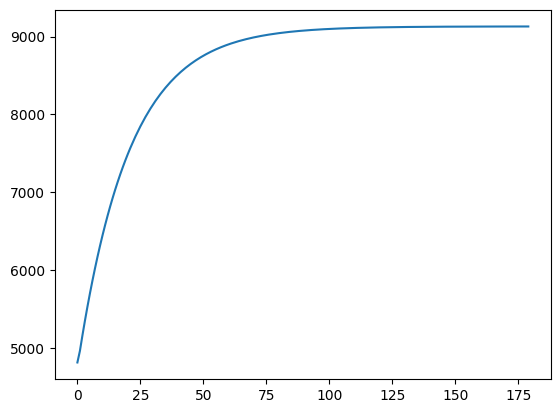

9145.66974595843
9129.193553645508


In [20]:
#plt.plot(defaultsim[5]) #lac_muscle mmol/kg wet weight

print("m_musc: ", defaultsim[11])
lac_total_mmol = defaultsim[5]*defaultsim[11]
#plt.plot(lac_total_mmol)
#plt.show()

#total joules
C2=100
lac_joules = lac_total_mmol*C2
plt.plot(lac_joules)
plt.show()

#print(lac_joules[-1])

#MG of 285 J/kg musc mass involved" - main p6
print(285*defaultsim[11])
print(lac_joules[-1]) #j a coincidence lol.




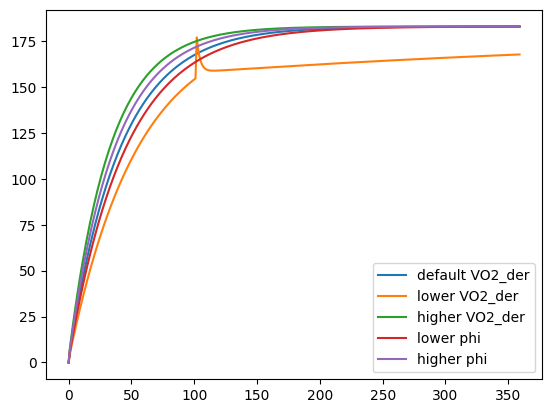

defaultsim 64.11
vo2_lo 48.09
vo2_hi 80.14
phi_lo 0.22
phi_hi 0.38
182.97
167.75
183.0
182.93
182.99


In [4]:
import matplotlib.pyplot as plt
C1=20.9

#print(defaultsim[9][0])
plt.plot(defaultsim[10],label='default VO2_der')
plt.plot(vo2_lo[10],label='lower VO2_der')
plt.plot(vo2_hi[10],label='higher VO2_der')
plt.plot(phi_lo[10],label='lower phi')
plt.plot(phi_hi[10],label='higher phi')
plt.legend()
plt.show()
print("defaultsim",round(1.34*1000/C1,2))
print("vo2_lo",round(1.34*.75*1000/C1,2))
print('vo2_hi',round(1.34*1.25*1000/C1,2))
print('phi_lo',round(.3*.75,2))
print('phi_hi',round(.3*1.25,2))
print(round(defaultsim[10][-2],2))
print(round(vo2_lo[10][-2],2))
print(round(vo2_hi[10][-2],2))
print(round(phi_lo[10][-2],2))
print(round(phi_hi[10][-2],2))
